<a href="https://colab.research.google.com/github/2714830587-xh/testgit/blob/master/2_3%E7%BA%BF%E6%80%A7%E4%BB%A3%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **线性代数⼩结**
• 标量、向量、矩阵和张量是线性代数中的基本数学对象。

• 向量泛化⾃标量，矩阵泛化⾃向量。

• 标量、向量、矩阵和张量分别具有零、⼀、⼆和任意数量的轴。

• ⼀个张量可以通过sum和mean沿指定的轴降低维度。

• 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

• 在深度学习中，我们经常使⽤范数，如L1范数、L2范数和Frobenius范数。

• 我们可以对标量、向量、矩阵和张量执⾏各种操作。
nihao






# **标量**

In [ ]:
import torch
# 加不加中括号?有什么区别
x = torch.tensor([3.0])
y = torch.tensor([2.0])
x + y, x * y, x / y, x**y



(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

# 向量
如果有两个输出值,上一个值会被覆盖吗?好像会的

In [ ]:

x=torch.arange(4)
x
x[3]
len(x)
x.shape

torch.Size([4])

# **矩阵**

In [ ]:
A=torch.arange(20).reshape(4,5)
A
# 转置,对称
A.T
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B
B==B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

# **张量及其基本性质**

In [ ]:
X = torch.arange(24).reshape(2, 3, 4)
X
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # 通过分配新内存，将A的⼀个副本分配给B
# 都是对应元素进行操作
X,A,A + B,A * B

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]), tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]), tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.],
         [144., 169., 196., 225.],
         [256., 289., 324., 361.]]))

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape


(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

# **降维** 加粗文字
指定axis=1将通过汇总所有列的元素降维（轴1）。???因此，输⼊轴1的维数在输出形状中消失

In [ ]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()
A.shape, A.sum()
# 按照指定轴来降维,例如按照行来???有问题
A_sum_axis0 = A.sum(axis=0)
A.shape,A,A_sum_axis0, A_sum_axis0.shape,A.sum(axis=[0, 1]) # SameasA.sum()最后一个行和列1一起求和


(torch.Size([5, 4]), tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([40., 45., 50., 55.]), torch.Size([4]), tensor(190.))

In [ ]:
A.mean(), A.sum() / A.numel()
A.mean(axis=0), A.sum(axis=0) / A.shape[0],A.shape[0]


(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]), 5)

# **非降维求和??**
sum_A在对每⾏进⾏求和后仍保持两个轴，我们可以通过⼴播将A除以sum_A。

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_B = A.sum(axis=1)
A,sum_A,sum_A.shape,sum_B,sum_B.shape,A / sum_A #利用广播机制
# 如果我们想沿某个轴计算A元素的累积总和，⽐如axis=0（按⾏计算），我们可以调⽤cumsum函数。此函数不会沿任何轴降低输⼊张量的维度。
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

# **点积**
是相同位置的按元素乘积的和


In [ ]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y),torch.sum(x * y)#等价表示

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.), tensor(6.))

# **矩阵-向量积-矩阵乘法**


In [ ]:
#A的列维数（沿轴1的⻓度）必须与x的维数（其⻓度）相同。
A,x,A.shape, x.shape, torch.mv(A, x)



(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

In [ ]:
B = torch.ones(4, 3)
A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

# **范数??-有点像距离单位**
1范数:它表⽰为向量元素的绝对值之和：

2范数:欧⼏⾥得距离是⼀个L2范数：假设n维向量x中的元素
是x1, . . . , xn，其L2范数是向量元素平⽅和的平⽅根：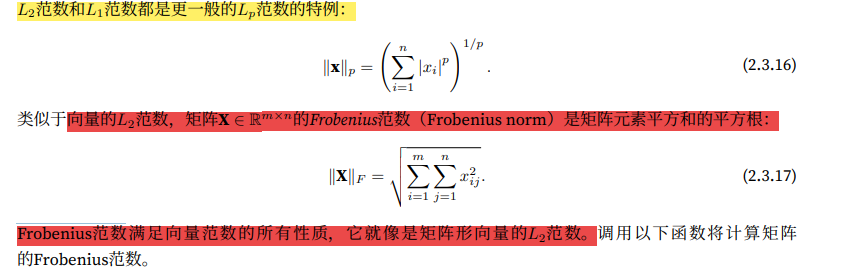




In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)
# 与L2范数相⽐，L1范数受异常值的影响较小。为了计算L1范数，我们将绝对值函数和按元素求和组合起来。
torch.abs(u).sum()
# Frobenius范数
torch.norm(torch.ones((4, 9)))


tensor(6.)

# **练习题**

1. 证明⼀个矩阵A的转置的转置是A，即(A
⊤)
⊤ = A。
2. 给出两个矩阵A和B，证明“它们转置的和”等于“它们和的转置”，即A
⊤ + B
⊤ = (A + B)
⊤。
3. 给定任意⽅阵A，A + A
⊤总是对称的吗?为什么?
4. 我们在本节中定义了形状(2, 3, 4)的张量X。len(X)的输出结果是什么？
5. 对于任意形状的张量X,len(X)是否总是对应于X特定轴的⻓度?这个轴是什么?
6. 运⾏A/A.sum(axis=1)，看看会发⽣什么。你能分析原因吗？
7. 考虑⼀个具有形状(2, 3, 4)的张量，在轴0、1、2上的求和输出是什么形状?-**-注意它如何消维度的**
8. 为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得
到什么?https://pytorch.org/docs/stable/generated/torch.linalg.norm.html#torch.linalg.norm


参考答案:https://discuss.d2l.ai/uploads/default/original/2X/d/d4ecced3611b6686fb8ddaeb31d143ccfe488fd2.jpeg



In [ ]:
# 第一题
A,A.T,A.T.T
#2
A=torch.arange(12).reshape(4,3)
A,B,A.T+B.T,(A+B).T
#3
#4
Y=torch.arange(24).reshape(2,3,4)
len(Y)
# 获得的是第一轴的数据
#5总对应axis=0这个轴
#6
A.shape,A.sum(axis=1).shape
# 注意非降维求和例如C
B=A/A.sum(axis=0)
C=A/A.sum(axis=1,keepdim=True)

A,A.sum(axis=0),A.sum(axis=1),A.shape,A.sum(axis=0).shape,A.sum(axis=1).shape,B,C
# 为啥运行不了A/A.sum(axis=1)就是应为A的列向量维度大小与另一个B的维度大小相匹配
#7
A=torch.ones((2,3,4))
B=A.sum(axis=0)
C=A.sum(axis=1)
D=A.sum(axis=2)
A,B.shape,C.shape,D.shape,B,C,D
#8


(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 torch.Size([3, 4]),
 torch.Size([2, 4]),
 torch.Size([2, 3]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[4., 4., 4.],
         [4., 4., 4.]]))